Nama : Alfendo Rizky Syachputra

Nim  : A11.2019.11918

### 1. Mengumpulkan Data

Breast Cancer Classification

- Anda adalah seorang Data Scientist pada sebuah perusahaan untuk membantu proyek Data Science untuk kebutuhan client. Saat ini Anda dilibatkan dalam proyek untuk prediksi Breast Cancer pada Rumah Sakit XYZ menggunakan dataset: wdbc.data.

- Buatlah model prediksi untuk penyakit Breast Cancer pada Rumah Sakit XYZ menggunakan 9 unit kompetensi: Mengumpulkan Data, Menelaah Data, Memvalidasi Data, Menentukan Objek Data, Membersihkan Data, Mengkonstruksi Data, Menentukan Label Data, Membangun Model dan Mengevaluasi Hasil Pemodelan.
Informasi tentang dataset tersebut ada di:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  
Dataset dapat diunduh pada [link](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)

- Terdiri dari 569 sample data dan 32 atribut
- Tidak terdapat missing value

### 2. Meanalaah Data

Terdiri dari :
- load library yang diperlukan
- load dataset
- memberikan nama header dan atributnya
- menaganalisa tipe dan relasi data
- memeberikan laporan ata kesimpulan dari hasil telaah data

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# import dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Kesimpulan** : Dataset yang digunakan terdiri dari 32 atribut dan 568 sample data

In [ ]:
# memberi nama header dan atribut
df.columns = ['id', 'Diagnosis', 'fitur1', 'fitur2', 'fitur3', 'fitur4', 'fitur5', 'fitur6', 
              'fitur7', 'fitur8', 'fitur9','fitur10', 'fitur11', 'fitur12', 'fitur13', 'fitur14', 
              'fitur15', 'fitur16', 'fitur17', 'fitur18','fitur19', 'fitur20', 'fitur21', 'fitur22', 
              'fitur23', 'fitur24', 'fitur25', 'fitur26', 'fitur27','fitur28', 'fitur29', 'fitur30']

In [ ]:
df.head(10)

,id,Diagnosis,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
 # menganalisa tipe dan relasi data
 # melihat tipe dataset
 type(df)

pandas.core.frame.DataFrame

In [ ]:
# melihat ukuran dataset
df.shape

(569, 32)

In [ ]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   fitur1     569 non-null    float64
 3   fitur2     569 non-null    float64
 4   fitur3     569 non-null    float64
 5   fitur4     569 non-null    float64
 6   fitur5     569 non-null    float64
 7   fitur6     569 non-null    float64
 8   fitur7     569 non-null    float64
 9   fitur8     569 non-null    float64
 10  fitur9     569 non-null    float64
 11  fitur10    569 non-null    float64
 12  fitur11    569 non-null    float64
 13  fitur12    569 non-null    float64
 14  fitur13    569 non-null    float64
 15  fitur14    569 non-null    float64
 16  fitur15    569 non-null    float64
 17  fitur16    569 non-null    float64
 18  fitur17    569 non-null    float64
 19  fitur18    569 non-null    float64
 20  fitur19   

In [ ]:
# melihat distribusi Diagnosis (apa saja jenisnya)
df['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# melihat distribusi Diagnosis (jumlah tiap diagnosis)
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [ ]:
# melihat banyaknya unique value pada masing - masing atribut
for col in df.columns:
  print(col,':', df[col].nunique())

id : 569
Diagnosis : 2
fitur1 : 456
fitur2 : 479
fitur3 : 522
fitur4 : 539
fitur5 : 474
fitur6 : 537
fitur7 : 537
fitur8 : 542
fitur9 : 432
fitur10 : 499
fitur11 : 540
fitur12 : 519
fitur13 : 533
fitur14 : 528
fitur15 : 547
fitur16 : 541
fitur17 : 533
fitur18 : 507
fitur19 : 498
fitur20 : 545
fitur21 : 457
fitur22 : 511
fitur23 : 514
fitur24 : 544
fitur25 : 411
fitur26 : 529
fitur27 : 539
fitur28 : 492
fitur29 : 500
fitur30 : 535


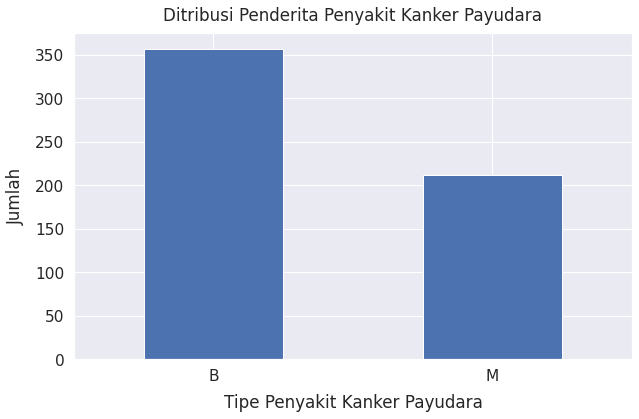

In [ ]:
# melihat distribusi Diagnosis (Visualisasi dengan Diagram Batang)
sns.set(font_scale=1.4)
df['Diagnosis'].value_counts().plot(kind='bar', figsize=(10,6), rot=0)
plt.xlabel('Tipe Penyakit Kanker Payudara', labelpad=10)
plt.ylabel('Jumlah', labelpad=10)
plt.title('Ditribusi Penderita Penyakit Kanker Payudara', y=1.02)
plt.show()

In [ ]:
# descriptive statistik bertipe numerik
df.describe()

,id,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# descriptive statistik bertipe object
df.describe(include='O').T

,count,unique,top,freq
Diagnosis,569,2,B,357


### **Kesimpulan :**

- Terdapat 3 tipe data yaitu int64, object, dan float64
- Jumlah distribusi Diagnosis B => 357 dan M => 212

## 3. Memvalidasi Data

In [ ]:
# cek dataframe
df.head(10)

,id,Diagnosis,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# mengecek apakah dataframe terdapat nilai kosong
df.isnull().values.any()

False

## 4. Menentukan Object Data
- Tidak masuk dalam soal

## 5. Memebersihkan Data

In [ ]:
# cek duplicate pada dataset
df.duplicated().sum()

0

In [ ]:
# cek missing value pada atribut
df.isnull().sum()

id           0
Diagnosis    0
fitur1       0
fitur2       0
fitur3       0
fitur4       0
fitur5       0
fitur6       0
fitur7       0
fitur8       0
fitur9       0
fitur10      0
fitur11      0
fitur12      0
fitur13      0
fitur14      0
fitur15      0
fitur16      0
fitur17      0
fitur18      0
fitur19      0
fitur20      0
fitur21      0
fitur22      0
fitur23      0
fitur24      0
fitur25      0
fitur26      0
fitur27      0
fitur28      0
fitur29      0
fitur30      0
dtype: int64

In [ ]:
# menghapus atribut 'id'
df.drop('id', axis=1, inplace=True)

In [ ]:
df

,Diagnosis,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 31)

## **Kesimpulan :**
- Tidak terdapat duplicate pada dataset
- Tidak terdapat missing values
- menghapus atribut 'id' karna tidak berpengaruh untuk proses analisis selanjutnya

### 6. Mengkonstruksi Data
T|erdiri dari :
- Representasi fitur dan merubah tipenya. 
- Membagi data menjadi training dan testing. 
- Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA.

In [ ]:
# mengecheck representasi fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diagnosis  569 non-null    object 
 1   fitur1     569 non-null    float64
 2   fitur2     569 non-null    float64
 3   fitur3     569 non-null    float64
 4   fitur4     569 non-null    float64
 5   fitur5     569 non-null    float64
 6   fitur6     569 non-null    float64
 7   fitur7     569 non-null    float64
 8   fitur8     569 non-null    float64
 9   fitur9     569 non-null    float64
 10  fitur10    569 non-null    float64
 11  fitur11    569 non-null    float64
 12  fitur12    569 non-null    float64
 13  fitur13    569 non-null    float64
 14  fitur14    569 non-null    float64
 15  fitur15    569 non-null    float64
 16  fitur16    569 non-null    float64
 17  fitur17    569 non-null    float64
 18  fitur18    569 non-null    float64
 19  fitur19    569 non-null    float64
 20  fitur20   

In [ ]:
# membagi training dan testing
X = df.iloc[:,1:31]
y = df['Diagnosis']

In [ ]:
X.head()

,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,fitur10,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object

Data Original

In [ ]:
# spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,fitur10,...,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27,fitur28,fitur29,fitur30
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


Data Normalisasi

In [ ]:
# scaling data
scaler = StandardScaler().fit_transform(X)

In [ ]:
scaler

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
X_train_scal, X_test_scal, Y_train_scal, Y_test_scal = train_test_split(scaler,y, test_size=0.2, random_state=42)

### 7. Menentukan Label Data

- Tidak perlu dikerjakan karena label sudah diputuskan dibagian transformasi data. 
- Merupakan Soal Tertulis.

### 8. Membangun Model
- Pemodelan yang diguakan yaitu Decision Tree d an Random Forest

In [ ]:
model1 = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=model1, n_estimators=100, bootstrap=True)

In [ ]:
model2 = RandomForestClassifier(n_estimators=50, random_state=42)

Pelatihan Model

In [ ]:
# menggunakan data original
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
# menggunakan data scaling
model2.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### 9. Mengevaluasi Model

In [ ]:
ori_y_pred_dt_train = bag_model.predict(X_train)
ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = bag_model.predict(X_test)
ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)
print(classification_report(Y_test,ori_y_pred_dt_test))

Akurasi pada training set:  1.0
Precision pada training set:  1.0
Recall pada training set:  1.0
Akurasi pada test set:  0.956140350877193
Precision pada test set:  0.956140350877193
Recall pada test set:  0.956140350877193
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



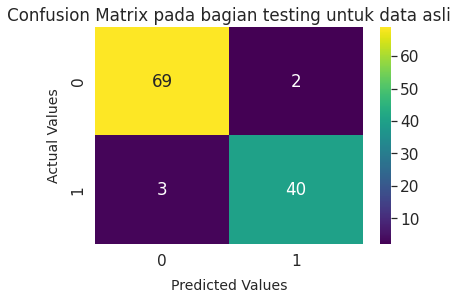

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
ori_y_pred_dt_train = model2.predict(X_train)
ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = model2.predict(X_test)
ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)
print(classification_report(Y_test,ori_y_pred_dt_test))

Akurasi pada training set:  1.0
Precision pada training set:  1.0
Recall pada training set:  1.0
Akurasi pada test set:  0.9649122807017544
Precision pada test set:  0.9649122807017544
Recall pada test set:  0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



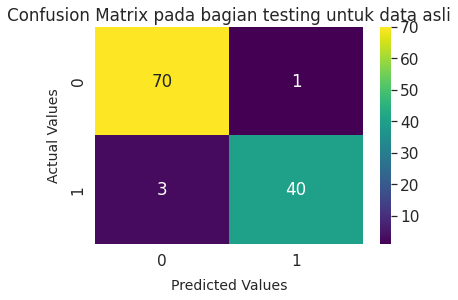

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()